In [17]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

seed = 0



In [18]:
df = pd.read_csv('input/movie_data_encoded.csv', sep='|')

In [19]:
#feat_names = list(df.columns)
feat_names = [col for col in df.columns if col != 'category']
print(feat_names)

['num__budget', 'num__revenue', 'num__popularity', 'num__runtime', 'num__vote_count', 'num__release_year', 'num__release_month', 'cat__original_language_ar', 'cat__original_language_bn', 'cat__original_language_bs', 'cat__original_language_cn', 'cat__original_language_cs', 'cat__original_language_da', 'cat__original_language_de', 'cat__original_language_el', 'cat__original_language_en', 'cat__original_language_es', 'cat__original_language_et', 'cat__original_language_fa', 'cat__original_language_fi', 'cat__original_language_fr', 'cat__original_language_he', 'cat__original_language_hi', 'cat__original_language_hu', 'cat__original_language_id', 'cat__original_language_it', 'cat__original_language_ja', 'cat__original_language_ko', 'cat__original_language_la', 'cat__original_language_mk', 'cat__original_language_nb', 'cat__original_language_nl', 'cat__original_language_no', 'cat__original_language_pl', 'cat__original_language_pt', 'cat__original_language_ro', 'cat__original_language_ru', '

In [20]:
#print(df.info())
#print(df.head())

In [21]:
# Encode categorical variables
#label_encoder = LabelEncoder()
#df['category'] = label_encoder.fit_transform(df['category'])  # Replace with your target column


X = df.drop('category', axis=1)
Y = df['category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
class_names = sorted(Y.unique().astype(str))

# Encode target variable (Y) using LabelEncoder
#label_encoder = LabelEncoder()
#Y_train_encoded = label_encoder.fit_transform(Y_train)
#Y_test_encoded = label_encoder.transform(Y_test)


print("Training set size: ", len(X_train))
print("Test set size: ", len(X_test))

Training set size:  7027
Test set size:  1757


## CART Algorithm Decision Tree

In [22]:
cart_tree = DecisionTreeClassifier(random_state=seed)

In [23]:
cart_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
Y_pred = cart_tree.predict(X_test)

In [25]:

accuracy = accuracy_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6392


In [26]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         bad       0.82      0.79      0.80       450
        good       0.51      0.53      0.52       430
       great       0.65      0.66      0.65       429
    mediocre       0.58      0.57      0.57       448

    accuracy                           0.64      1757
   macro avg       0.64      0.64      0.64      1757
weighted avg       0.64      0.64      0.64      1757



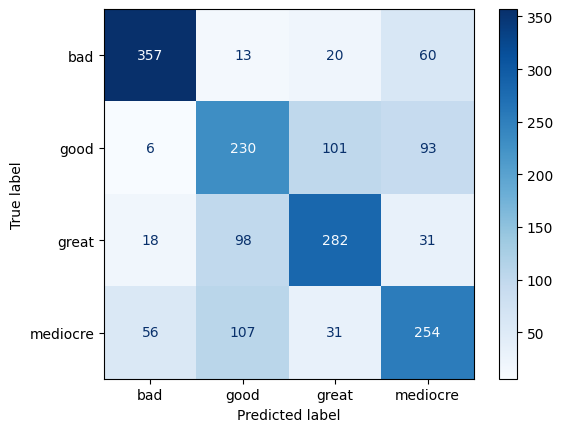

In [30]:
# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


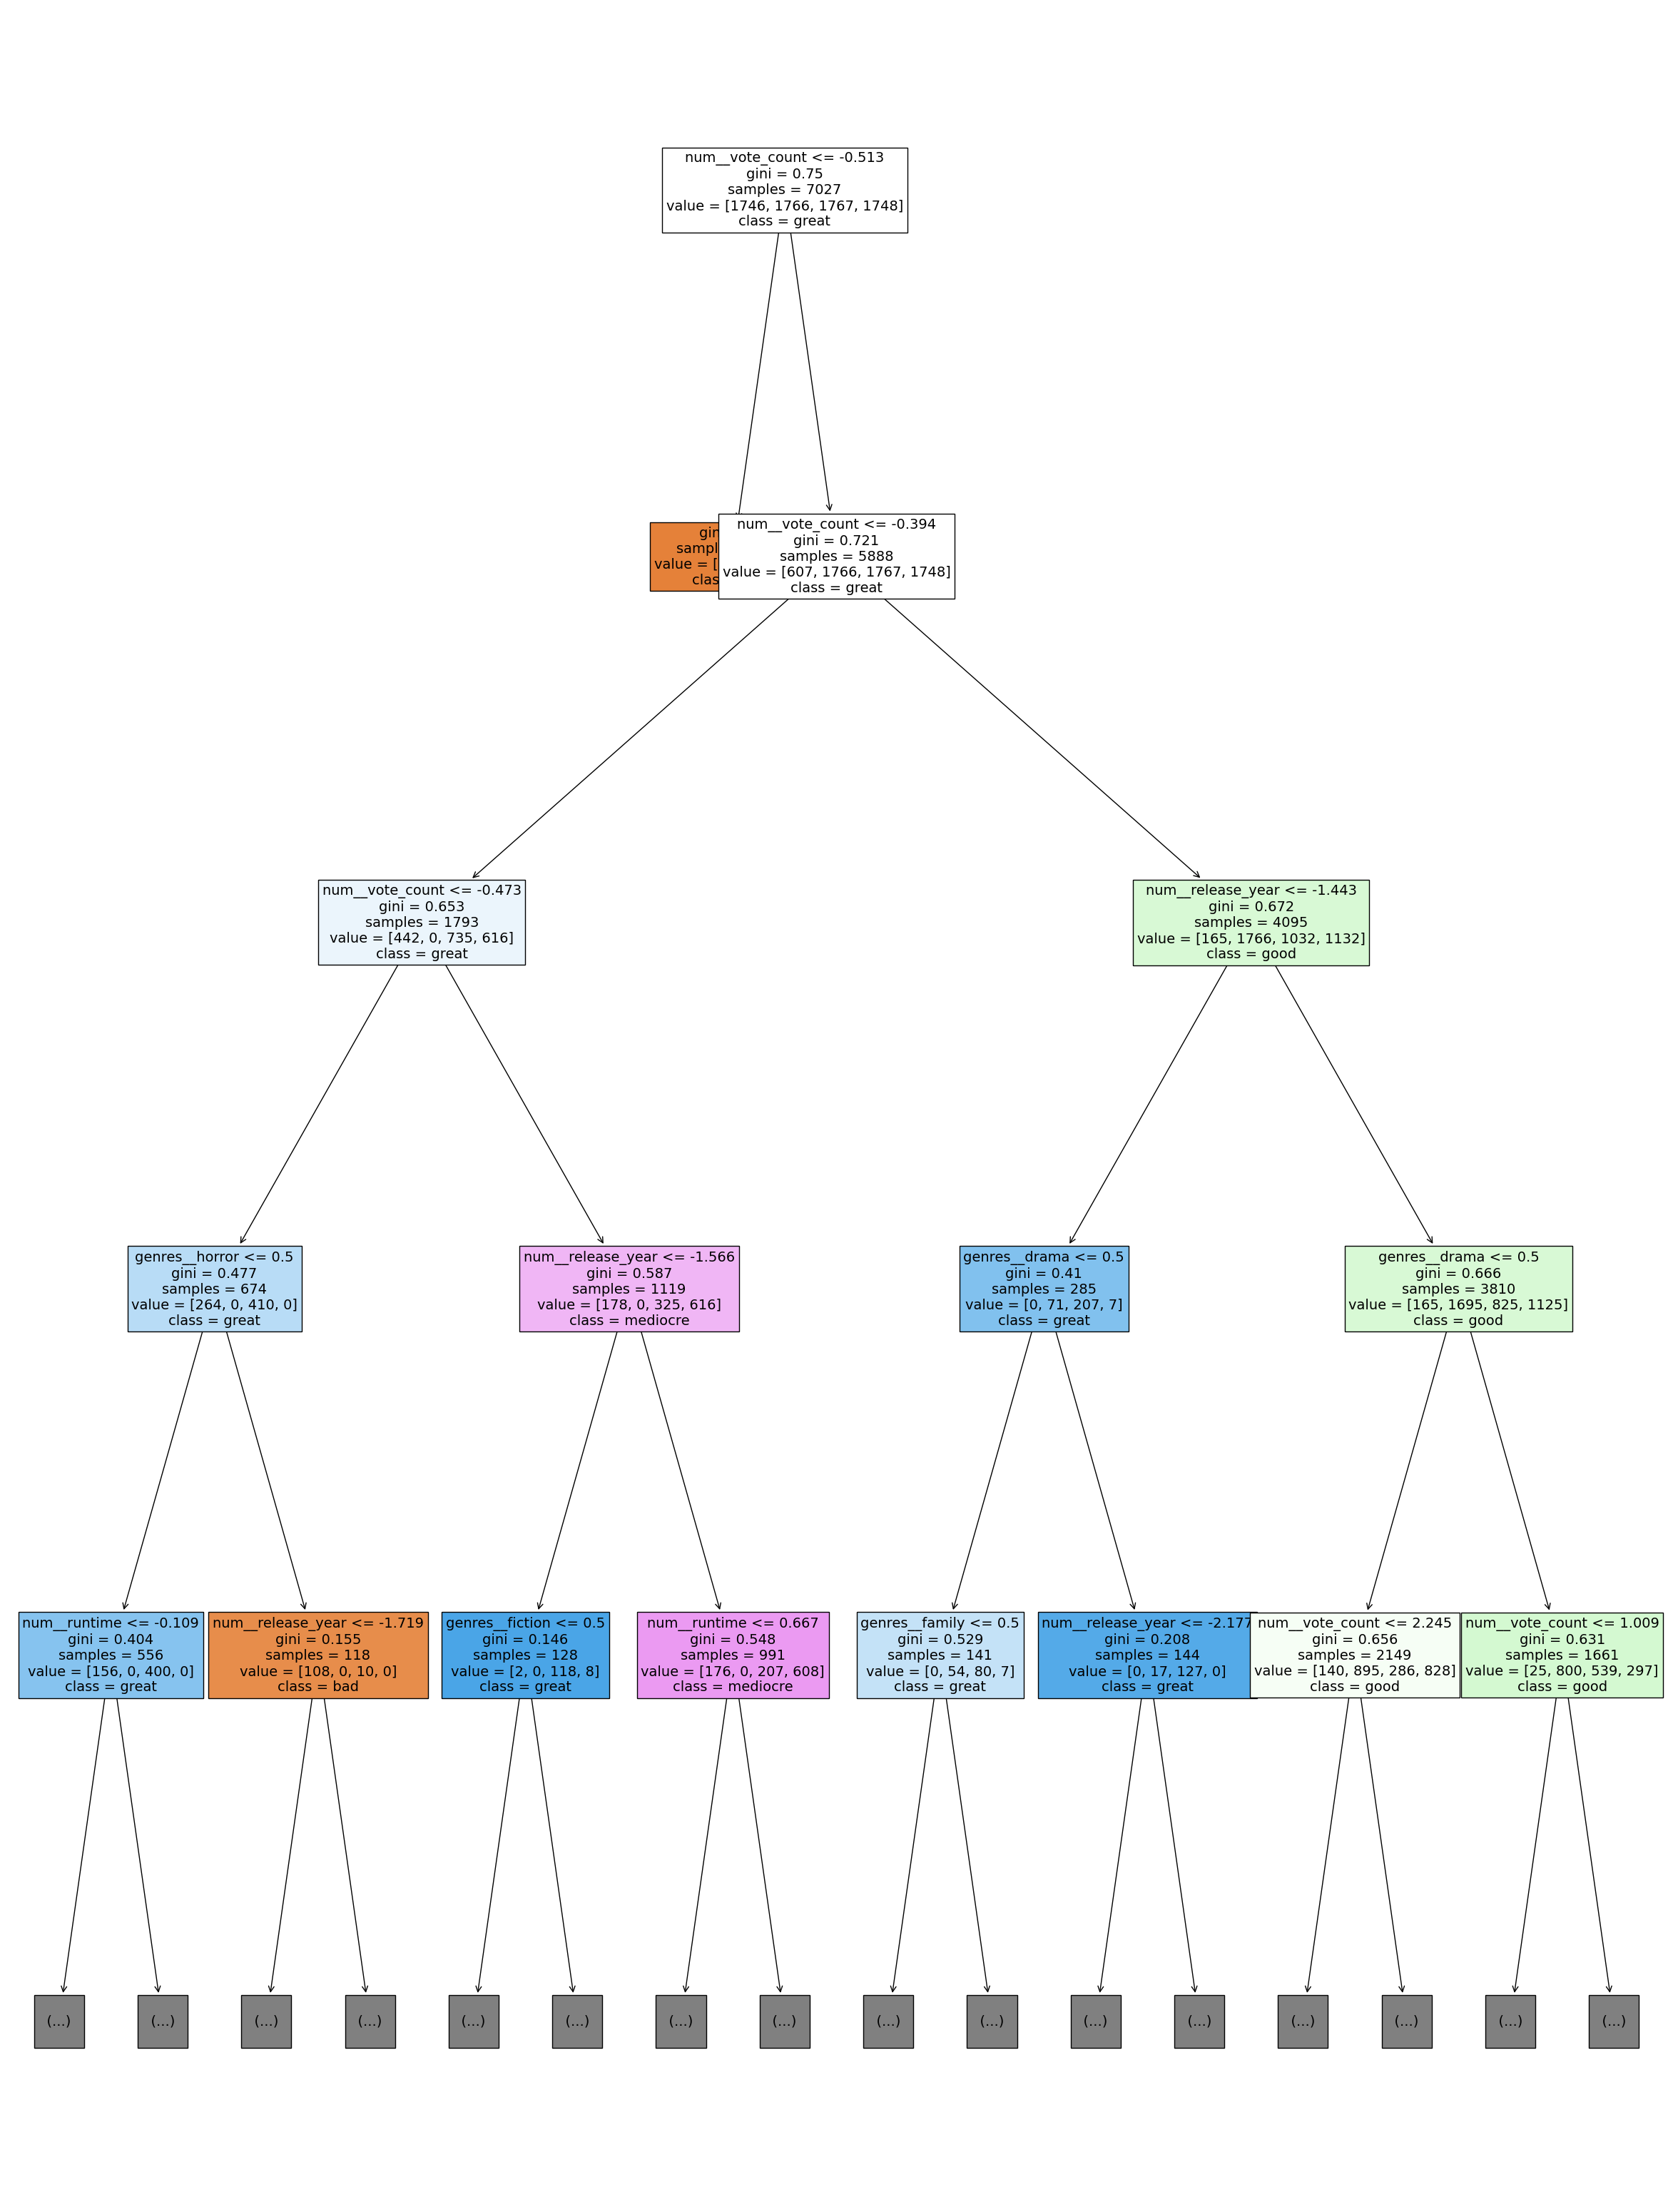

In [27]:

# Visualizing the decision tree with bigger rectangles and text
plt.figure(figsize=(30, 40)) 
plot_tree(cart_tree, 
          filled=True, 
          feature_names=feat_names, 
          class_names=class_names, 
          max_depth=4, 
          fontsize=14)  
plt.show()



In [28]:
# Writing the decision tree rules as text
tree_rules = export_text(cart_tree, feature_names=feat_names)
print(tree_rules)



|--- num__vote_count <= -0.51
|   |--- class: bad
|--- num__vote_count >  -0.51
|   |--- num__vote_count <= -0.39
|   |   |--- num__vote_count <= -0.47
|   |   |   |--- genres__horror <= 0.50
|   |   |   |   |--- num__runtime <= -0.11
|   |   |   |   |   |--- num__release_year <= -0.77
|   |   |   |   |   |   |--- num__popularity <= -0.22
|   |   |   |   |   |   |   |--- production_companies__orionpictures <= 0.50
|   |   |   |   |   |   |   |   |--- overview__finds <= 0.41
|   |   |   |   |   |   |   |   |   |--- class: great
|   |   |   |   |   |   |   |   |--- overview__finds >  0.41
|   |   |   |   |   |   |   |   |   |--- class: bad
|   |   |   |   |   |   |   |--- production_companies__orionpictures >  0.50
|   |   |   |   |   |   |   |   |--- class: bad
|   |   |   |   |   |   |--- num__popularity >  -0.22
|   |   |   |   |   |   |   |--- num__vote_count <= -0.49
|   |   |   |   |   |   |   |   |--- class: bad
|   |   |   |   |   |   |   |--- num__vote_count >  -0.49
|   |   |  

In [31]:
# Feature importance
importances = pd.Series(cart_tree.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Important Features:\n", importances.head(10))

Top 10 Important Features:
 num__vote_count              0.362140
num__release_year            0.073837
num__runtime                 0.046086
num__popularity              0.038503
num__budget                  0.030885
num__revenue                 0.024104
genres__drama                0.021169
genres__horror               0.019632
cat__original_language_en    0.017495
num__release_month           0.015125
dtype: float64


#### Wrappers to  tune parameters

#### RandomizedSearchCV

In [32]:
"""
from sklearn.model_selection import RandomizedSearchCV

new_cart_tree = DecisionTreeClassifier(random_state=seed)


param_grid = {
    'criterion': ['gini', 'entropy'],  # Split quality
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6],  # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
}

random_search = RandomizedSearchCV(estimator=new_cart_tree, 
                                   param_distributions=param_grid, 
                                   n_iter=500, 
                                   scoring='accuracy',
                                   cv=5, 
                                   verbose=1, 
                                   random_state=seed,
                                   n_jobs=-1)


random_search.fit(X_train, Y_train_encoded)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

#Output: 
#Fitting 5 folds for each of 432 candidates, totalling 2160 fits, 720 fits failed out of a total of 2160.
#Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'entropy'}
#Best Cross-Validation Score: 0.543764041246716
"""


'\nfrom sklearn.model_selection import RandomizedSearchCV\n\nnew_cart_tree = DecisionTreeClassifier(random_state=seed)\n\n\nparam_grid = {\n    \'criterion\': [\'gini\', \'entropy\'],  # Split quality\n    \'max_depth\': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree\n    \'min_samples_split\': [2, 5, 10],  # Minimum samples required to split an internal node\n    \'min_samples_leaf\': [1, 2, 4, 6],  # Minimum samples required to be at a leaf node\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\'],  # Number of features to consider for the best split\n}\n\nrandom_search = RandomizedSearchCV(estimator=new_cart_tree, \n                                   param_distributions=param_grid, \n                                   n_iter=500, \n                                   scoring=\'accuracy\',\n                                   cv=5, \n                                   verbose=1, \n                                   random_state=seed,\n                                   n_job

In [34]:
# Best parameters from RandomizedSearchCV wrapper output
best_params = {
    'criterion': 'entropy',
    'max_depth': 30,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2
}

new_cart_tree = DecisionTreeClassifier(random_state=seed, **best_params)

new_cart_tree.fit(X_train, Y_train)

Y_pred_new = new_cart_tree.predict(X_test)

In [36]:

accuracy = accuracy_score(Y_test, Y_pred_new)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.5287


In [38]:
print(classification_report(Y_test, Y_pred_new))

              precision    recall  f1-score   support

         bad       0.72      0.70      0.71       450
        good       0.41      0.43      0.42       430
       great       0.53      0.53      0.53       429
    mediocre       0.46      0.46      0.46       448

    accuracy                           0.53      1757
   macro avg       0.53      0.53      0.53      1757
weighted avg       0.53      0.53      0.53      1757



#### GridSearch

In [39]:

param_grid_search = {
    'max_depth': [5, 10, 15, 20, 25, 30, 40, 50, 60, 100, None],    
    'max_features': ['auto', 'sqrt', 'log2', 0.2, 0.5, 0.8, 1],      
    'min_samples_split': [2, 3, 4, 5, 6, 8, 10, 15, 20],            
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 10],                    
    'criterion': ['gini', 'entropy'],                               
    'splitter': ['best', 'random']                                  
}



In [40]:
grid_search = GridSearchCV(
    estimator=cart_tree, 
    param_grid=param_grid_search, 
    scoring='accuracy', 
    cv=5, 
    verbose=2, 
    n_jobs=-1
)

In [41]:
#grid_search.fit(X_train, Y_train_encoded)

#print("Best parameters:", grid_search.best_params_)

#Output:
#~36min
#Fitting 5 folds for each of 19404 candidates, totalling 97020 fits, 13860 fits failed out of a total of 97020.
#Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.8, 'min_samples_leaf': 5, 'min_samples_split': 15, 'splitter': 'best'}


In [43]:
best_params = {
    'criterion': 'entropy', 
    'max_depth': 10, 
    'max_features': 0.8, 
    'min_samples_leaf': 5, 
    'min_samples_split': 15, 
    'splitter': 'best'
}

best_cart_model = DecisionTreeClassifier(**best_params, random_state=seed)


best_cart_model.fit(X_train, Y_train)
Y_pred_best = best_cart_model.predict(X_test)

In [45]:
accuracy = accuracy_score(Y_test, Y_pred_best)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6716


In [47]:
print(classification_report(Y_test, Y_pred_best))

              precision    recall  f1-score   support

         bad       0.94      0.78      0.85       450
        good       0.53      0.60      0.56       430
       great       0.73      0.60      0.66       429
    mediocre       0.58      0.70      0.63       448

    accuracy                           0.67      1757
   macro avg       0.69      0.67      0.68      1757
weighted avg       0.70      0.67      0.68      1757



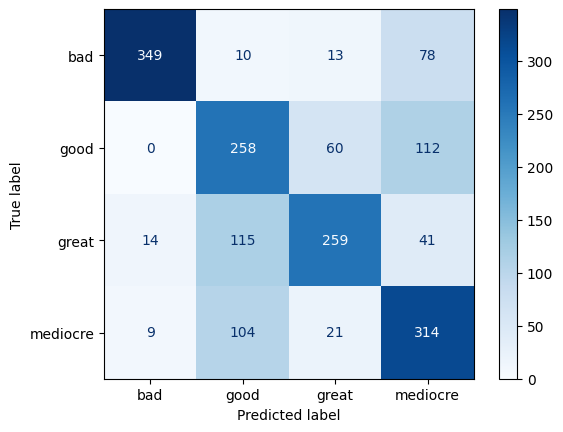

In [54]:
# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


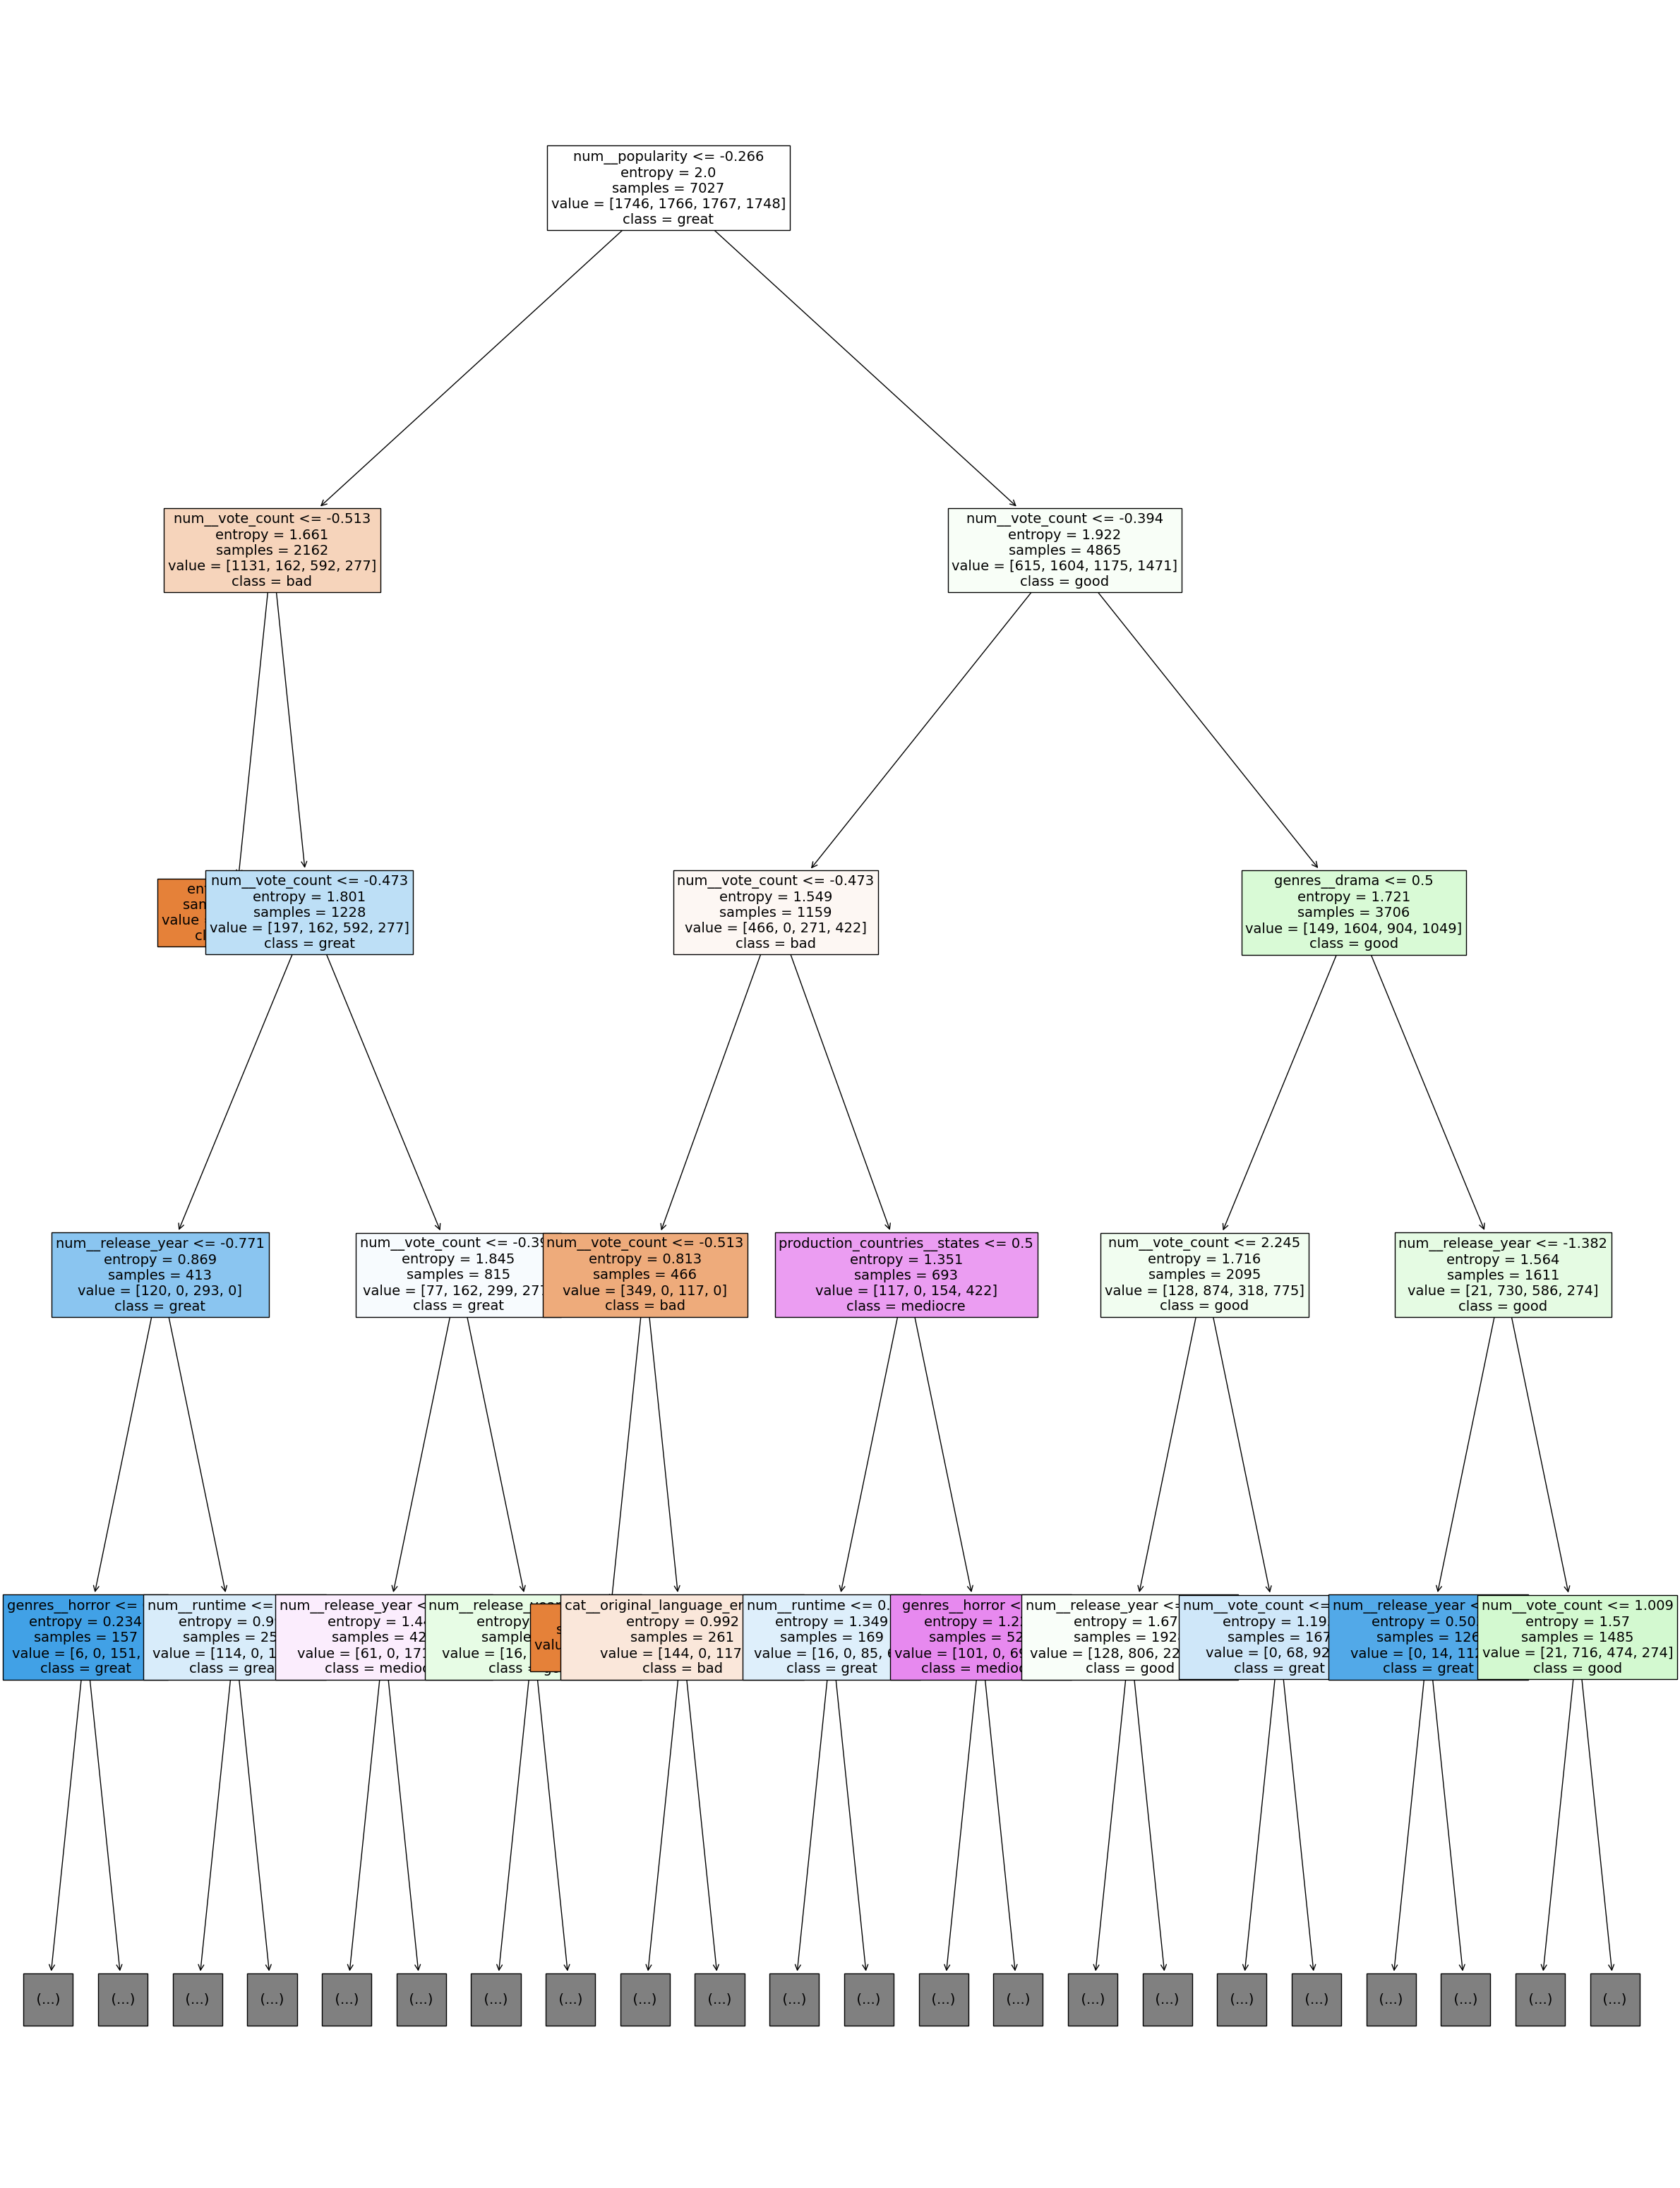

In [55]:

plt.figure(figsize=(30, 40)) 
plot_tree(best_cart_model, 
          filled=True, 
          feature_names=feat_names, 
          class_names=class_names, 
          max_depth=4, 
          fontsize=14)  
plt.show()


In [56]:
tree_rules = export_text(best_cart_model, feature_names=feat_names)
print(tree_rules)

|--- num__popularity <= -0.27
|   |--- num__vote_count <= -0.51
|   |   |--- class: bad
|   |--- num__vote_count >  -0.51
|   |   |--- num__vote_count <= -0.47
|   |   |   |--- num__release_year <= -0.77
|   |   |   |   |--- genres__horror <= 0.50
|   |   |   |   |   |--- genres__fantasy <= 0.50
|   |   |   |   |   |   |--- class: great
|   |   |   |   |   |--- genres__fantasy >  0.50
|   |   |   |   |   |   |--- class: great
|   |   |   |   |--- genres__horror >  0.50
|   |   |   |   |   |--- class: great
|   |   |   |--- num__release_year >  -0.77
|   |   |   |   |--- num__runtime <= -0.11
|   |   |   |   |   |--- genres__documentary <= 0.50
|   |   |   |   |   |   |--- num__runtime <= -1.66
|   |   |   |   |   |   |   |--- class: great
|   |   |   |   |   |   |--- num__runtime >  -1.66
|   |   |   |   |   |   |   |--- production_countries__america <= 0.50
|   |   |   |   |   |   |   |   |--- num__release_year <= -0.22
|   |   |   |   |   |   |   |   |   |--- class: great
|   |   |  

Top 10 Important Features (Tuned Model):
 num__vote_count              0.501148
num__popularity              0.147663
num__release_year            0.090419
num__runtime                 0.051165
genres__drama                0.037430
cat__original_language_en    0.027733
num__budget                  0.027350
genres__documentary          0.022175
num__revenue                 0.017144
genres__animation            0.009814
dtype: float64


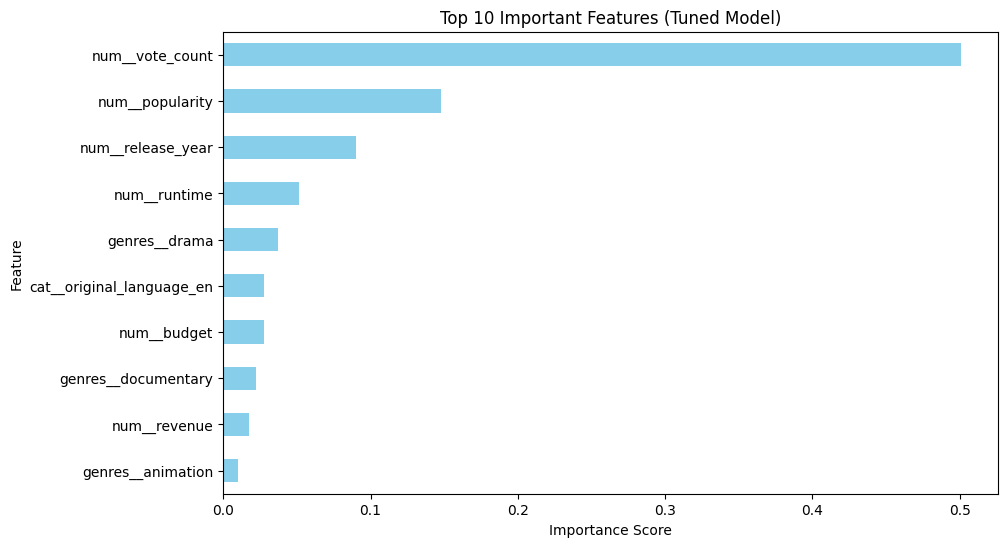

In [58]:
# Feature importance for the tuned model
best_importances = pd.Series(best_cart_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Display the top 10 most important features
print("Top 10 Important Features (Tuned Model):\n", best_importances.head(10))

# Optional: Visualize the feature importances
plt.figure(figsize=(10, 6))
best_importances.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features (Tuned Model)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()
